In [65]:
import os
from datetime import datetime, timedelta
import requests
import pandas as pd


def get_data(file, df):
    global today
    if(os.path.exists(file)):
        original_countries = pd.read_csv('positiveCases.csv')
        current_df = pd.read_csv(file)
        current_df[today] = pd.DataFrame(columns=[today])
        today_data = []
        yesterday = str((datetime.strptime(today,"%m-%d-%y") -timedelta(
                days=1)).strftime("%m-%d-%y"))
        for country in original_countries.iloc[:, 0]:
            if (country in list(df.loc[:, 'Country'])):
                today_data.append(int(df[df['Country'] == country][today]))
            else:
                today_data.append(current_df.loc[current_df['Country'] == country][yesterday].item())
        current_df[today] = pd.Series(today_data)
        current_df.to_csv(file, index=False)
    else:
        countries = requests.get("https://api.covid19api.com/countries").json()
        countries = sorted([i['Country'] for i in countries])
        country_df = pd.DataFrame(data=countries, columns=['Country'])
        country_df[today] = df[today]
        country_df.to_csv(file, index=False)


data = requests.get("https://api.covid19api.com/summary").json()
today = str(datetime.strptime(data['Countries'][0]['Date'][:10], "%Y-%m-%d").strftime("%m-%d-%y"))

global_data = data["Global"]
print(f"\nGlobal statistics as of {today}")
print(f"Total cases: {global_data['TotalConfirmed']}")
print(f"New cases since yesterday: {global_data['NewConfirmed']}")
print(f"Total deaths: {global_data['TotalDeaths']}")
print(f"New deaths since yesterday: {global_data['NewDeaths']}")
print(f"Total recovered: {global_data['TotalRecovered']}")
print(f"New recovered since yesterday: {global_data['NewRecovered']}")

country_df_positiveCases = pd.DataFrame(columns=['Country', today])
country_df_deaths = pd.DataFrame(columns=['Country', today])
country_df_recovered = pd.DataFrame(columns=['Country', today])

for country in data["Countries"]:
    country_df_positiveCases = country_df_positiveCases.append(
        {'Country': country['Country'], today: country['TotalConfirmed']}, ignore_index=True)
    country_df_deaths = country_df_deaths.append(
        {'Country': country['Country'], today: country['TotalDeaths']}, ignore_index=True)
    country_df_recovered = country_df_recovered.append(
        {'Country': country['Country'], today: country['TotalRecovered']}, ignore_index=True)

get_data('positiveCases.csv', country_df_positiveCases)
get_data('deaths.csv', country_df_deaths)
get_data('recovered.csv', country_df_recovered)

positiveCases_df = pd.read_csv('positiveCases.csv')
confirmed_df = positiveCases_df.sort_values(by=today, ascending=False)
countries = [positiveCases_df.iloc[i]['Country'] for i in range(5)]
recovered_df = pd.read_csv('recovered.csv')
deaths_df = pd.read_csv('deaths.csv')


Global statistics as of 06-09-20
Total cases: 7215417
New cases since yesterday: 109895
Total deaths: 414415
New deaths since yesterday: 3825
Total recovered: 3292916
New recovered since yesterday: 152647


In [2]:
import requests
history_data = requests.get("https://api.covid19api.com/total/country/united-states/status/confirmed").json()
print(history_data)

[{'Country': 'United States of America', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Cases': 1, 'Status': 'confirmed', 'Date': '2020-01-22T00:00:00Z'}, {'Country': 'United States of America', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Cases': 1, 'Status': 'confirmed', 'Date': '2020-01-23T00:00:00Z'}, {'Country': 'United States of America', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Cases': 2, 'Status': 'confirmed', 'Date': '2020-01-24T00:00:00Z'}, {'Country': 'United States of America', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Cases': 2, 'Status': 'confirmed', 'Date': '2020-01-25T00:00:00Z'}, {'Country': 'United States of America', 'CountryCode': '', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '0', 'Lon': '0', 'Cases': 5, 'Status': 'confirmed', 'Date': '2020-01-26T00:00:00Z'}, {'Country': 'United Stat

In [4]:
import json
from pandas.io.json import json_normalize
dataframe = json_normalize(history_data)
print(dataframe['Cases'])
print(dataframe["Date"])
#print(history_data[:len(history_data)]['Cases'])


0            1
1            1
2            2
3            2
4            5
5            5
6            5
7            5
8            5
9            7
10           8
11           8
12          11
13          11
14          11
15          11
16          11
17          11
18          11
19          11
20          12
21          12
22          13
23          13
24          13
25          13
26          13
27          13
28          13
29          13
        ...   
111    1369376
112    1390406
113    1417774
114    1442824
115    1467820
116    1486757
117    1508308
118    1528568
119    1551853
120    1577147
121    1600937
122    1622612
123    1643246
124    1662302
125    1680913
126    1699176
127    1721753
128    1746019
129    1770165
130    1790172
131    1811360
132    1831821
133    1851520
134    1872660
135    1897380
136    1920061
137    1942363
138    1960897
139    1979411
140    2000464
Name: Cases, Length: 141, dtype: int64
0      2020-01-22T00:00:00Z
1      2020-01-23T

In [50]:
import datetime as dt
#dataframe["Date"].apply(lambda x: x.toordinal())
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 

dataframe['Date'] = pd.to_datetime(dataframe['Date'])    
dataframe['date_delta'] = (dataframe['Date'] - dataframe['Date'].min())  / np.timedelta64(1,'D')+1

X = dataframe['date_delta']
Y = dataframe['Cases']
# Fitting y = Ae^(Bx)
coef = np.polyfit(X, np.log(Y), 1, w=np.sqrt(Y))
# y ≈ exp(11.23161744) * exp(0.02468767 * x)
# Fitting y = mx + b
X = dataframe['date_delta'].values.reshape(-1,1)
Y = dataframe['Cases'].values.reshape(-1,1)
model = LinearRegression().fit(X, Y)
print(model.coef_)
print(model.intercept_)

[[15778.1724817]]
[-518212.74265451]


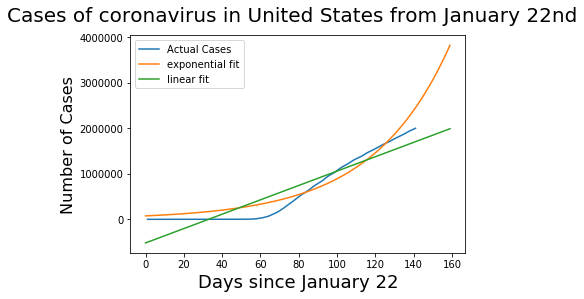

In [53]:
fig = plt.figure()
actualvals = plt.plot(X, Y, label = 'Actual Cases')
fig.suptitle('Cases of coronavirus in United States from January 22nd', fontsize=20)
plt.xlabel('Days since January 22', fontsize=18)
plt.ylabel('Number of Cases', fontsize=16)
xvals = np.array(range(160))
yvals = np.exp(coef[1]) * np.exp(coef[0] * xvals)
expline = plt.plot(xvals,yvals, label = 'exponential fit')
linyvals = model.coef_[0] * xvals + model.intercept_
linearline = plt.plot(xvals, linyvals, label = 'linear fit')
# plt.legend([expline, linearline], ['Line Up', 'Line Down'])
# plt.show()
plt.legend(loc='best')
plt.show()

C:\Users\mattt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.
